# LOAD Modules

In [1]:
%matplotlib inline
#%matplotlib widget
%load_ext autoreload
%autoreload 2


import numpy as np
from visualisations import eeg_sample_plot, events_distribution_plot, curve_name_gen
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor
from torch.utils.data import DataLoader
from datasets import ChannelsVoltageDataset
from neural_nets.nn_models_getter import get_nn_model
from optimizers import get_optimizer
from utils_train import fit, test, plot_all_metrics, plot_val_metrics, final_test_acc
from configs import configs_ozhan, configs_tim, configs_joaquin
from data_loader_creation import get_dataloader_objects
from classification_results import results_storer



# Select the configuration

In [2]:
""" USER: SELECT THE CONFIGURATION YOU NEED """
#myList = configs_tim.list_of_configs
#myList = configs_joaquin.list_of_configs
myList = configs_ozhan.list_of_configs

# Train

ConvNetOzhan_Adam 
-------------------------

We are not on the cluster...

Data is being loaded using MNE...


100%|██████████| 6/6 [00:31<00:00,  5.74s/it]


5418 matching events found
No baseline correction applied
...data loading with MNE was finished. 

Data is being augmented with gaussian noise...


100%|██████████| 4388/4388 [00:08<00:00, 530.09it/s]


...augmentation with gaussian noise is finished. 

cuda will be used for training of this model.
You have 2 GPUs for training!
Learning Rate:  0.002 

-> Epoch 1/10: train_loss: 2.1737, train_accuracy: 13.0242%, val_loss: 2.1666, val_accuracy: 17.6230%
-> Epoch 2/10: train_loss: 2.0963, train_accuracy: 24.4531%, val_loss: 2.1022, val_accuracy: 23.7705%
-> Epoch 3/10: train_loss: 2.0375, train_accuracy: 30.8797%, val_loss: 2.0600, val_accuracy: 25.6148%
-> Epoch 4/10: train_loss: 1.9905, train_accuracy: 35.4034%, val_loss: 2.0291, val_accuracy: 29.9180%
-> Epoch 5/10: train_loss: 1.9698, train_accuracy: 37.2151%, val_loss: 2.0158, val_accuracy: 32.1721%

New Learning Rate:  0.001
-> Epoch 6/10: train_loss: 1.9523, train_accuracy: 38.7420%, val_loss: 2.0016, val_accuracy: 35.2459%
-> Epoch 7/10: train_loss: 1.9477, train_accuracy: 39.1180%, val_loss: 2.0054, val_accuracy: 32.9918%
-> Epoch 8/10: train_loss: 1.9443, train_accuracy: 38.5825%, val_loss: 2.0154, val_accuracy: 34.6311%
-> Epo

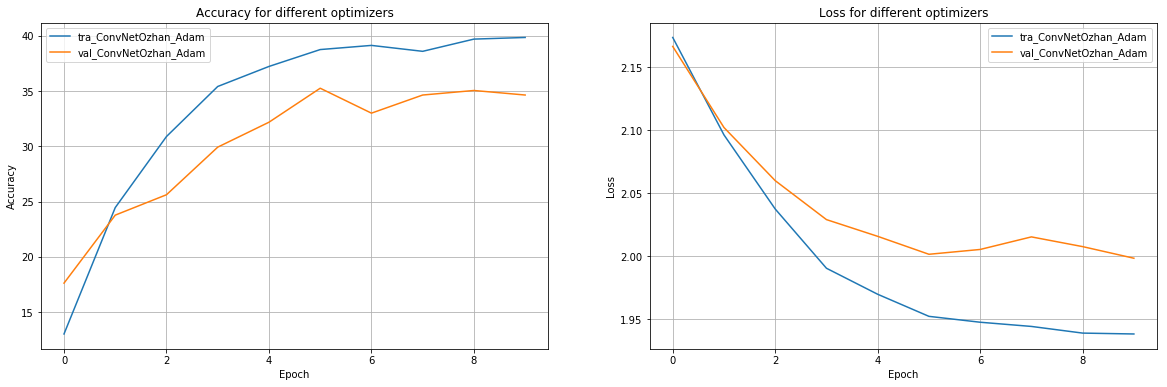

In [3]:
training_curves = {}

for my_cfg in myList:
    
    curve_name_gen(my_cfg)
    
    """ PREPARE DATALOADERS """
    train_dl, val_dl, test_dl, input_dimension_, output_dimension_ = get_dataloader_objects(my_cfg)


    """CLASSIFICATION"""
    # Get the model
    model_untrained = get_nn_model(my_cfg, input_dimension=input_dimension_,output_dimension=output_dimension_)

    # Get the optimizer
    optimizer = get_optimizer(my_cfg, model_untrained.parameters())

    # Train and show validation loss
    train_losses, train_accuracies, val_losses, val_accuracies, model_trained, time_spent_for_training_s =\
        fit(train_dl, val_dl, model_untrained, optimizer, my_cfg)
    
    curves = train_losses, train_accuracies, val_losses, val_accuracies, model_trained, time_spent_for_training_s
    training_curves[my_cfg.curve_name] = curves
    
    # Report final accuracy
    test_loss, test_accuracy =  final_test_acc(model_trained, test_dl, my_cfg)


    # Store the results
    results_storer.store_results_for_plot(my_cfg,test_loss, test_accuracy, train_losses,
                                 train_accuracies, time_spent_for_training_s, val_losses, val_accuracies)

    results_storer.store_results(my_cfg, model_trained, optimizer, test_loss, test_accuracy, train_losses,
                                 train_accuracies, time_spent_for_training_s, val_losses, val_accuracies, test_dl)


plot_all_metrics(training_curves)